In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('Phising_Training_Dataset.csv')

df = df.set_index('key')

In [2]:
df['Result'].value_counts()

 1    5034
-1    3921
Name: Result, dtype: int64

Found no class imbalance.

We can look upon accuracy as validation metrics but out aim to increase precision and f1 score in this case i.e. we want to reduce the false positive(classifying legitimate emails as phishing)

### Basic exploration of dataset

In [7]:
df.describe()

,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.00000,8955.000000,...,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000
mean,0.307203,-0.635734,0.740480,0.709436,0.740704,-0.735343,0.071803,0.264545,-0.33646,0.623227,...,0.606700,0.829816,0.028922,0.371078,0.291792,-0.479397,0.712339,0.338582,0.728867,0.124288
std,0.951697,0.763660,0.672116,0.704809,0.671870,0.677733,0.817419,0.908003,0.94175,0.782084,...,0.794975,0.558069,0.999637,0.928654,0.825557,0.877647,0.701874,0.576068,0.684694,0.992302
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.00000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df_cat = df.astype("category")

In [9]:
df_cat.describe()

,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,8955,8955,8955,8955,8955,8955,8955,8955,8955,8955,...,8955,8955,8955,8955,8955,8955,8955,8955,8955,8955
unique,2,3,2,2,2,2,3,3,2,2,...,2,2,2,2,3,2,2,3,2,2
top,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,0,1,1
freq,5853,7267,7793,7654,7794,7770,3336,5189,5984,7268,...,7194,8193,4607,6139,4739,6624,7667,4957,7741,5034


### Distribution of independent variables

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='

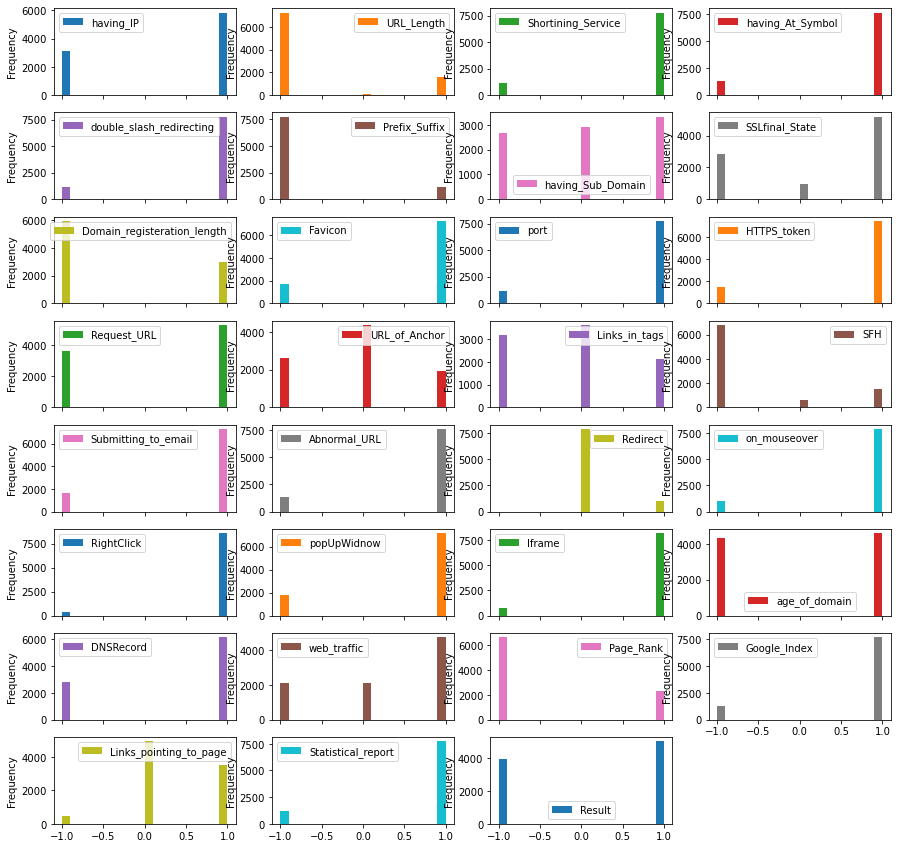

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot.hist(subplots=True, layout=(8,4), figsize=(15, 15), bins=20)

In [11]:
!pip install seaborn

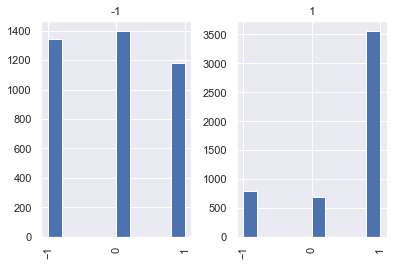

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() #rescue matplotlib's styles from the early '90s
df.hist(by='Result',column = 'web_traffic')
plt.show()

### Train test split

In [15]:
x = df.drop('Result',axis=1).values 
y = df['Result'].values


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 7164 samples.
Testing set has 1791 samples.


## Base model Decision Tree

In [16]:
from sklearn import tree
model_tree = tree.DecisionTreeClassifier()
model_tree_fitted = model_tree.fit(x_train, y_train)

In [7]:
#cols = list(df.columns)[:-1]
# import graphviz 
# dot_data = tree.export_graphviz(model, out_file=None, 
#                       feature_names = cols, class_names =  ['-1','1'],
#                       filled=True, rounded=True,  
#                       special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph 

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [18]:
#Test the model using testing data
tree_predictions = model_tree_fitted.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,tree_predictions)

array([[740,  26],
       [ 35, 990]], dtype=int64)

In [20]:
print("f1 score is ",f1_score(y_test,tree_predictions,average='weighted'))
print("The accuracy of Decision Tree Algorithm on testing data is: ",100.0 *accuracy_score(y_test,tree_predictions))

f1 score is  0.9659651804511852
The accuracy of Decision Tree Algorithm on testing data is:  96.59408151870463


## Base model Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
model_forest =RandomForestClassifier()
model_forest_fitted = model_forest.fit(x_train, y_train)

In [22]:
forest_predictions = model_forest_fitted.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,forest_predictions)

array([[ 737,   29],
       [  18, 1007]], dtype=int64)

In [24]:
print("f1 score is ",f1_score(y_test,forest_predictions,average='weighted'))
print("The accuracy of Random Forest Algorithm on testing data is: ",100.0 *accuracy_score(y_test,forest_predictions))

f1 score is  0.9737328143905877
The accuracy of Random Forest Algorithm on testing data is:  97.37576772752652


### Feature Importance

In [25]:
feature_importances_df = pd.DataFrame(
    {"feature": list(df.drop('Result',axis=1).columns), "importance": model_forest_fitted.feature_importances_}
).sort_values("importance", ascending=False)

<AxesSubplot:title={'center':'Visualizing Important Features'}, xlabel='feature', ylabel='importance'>

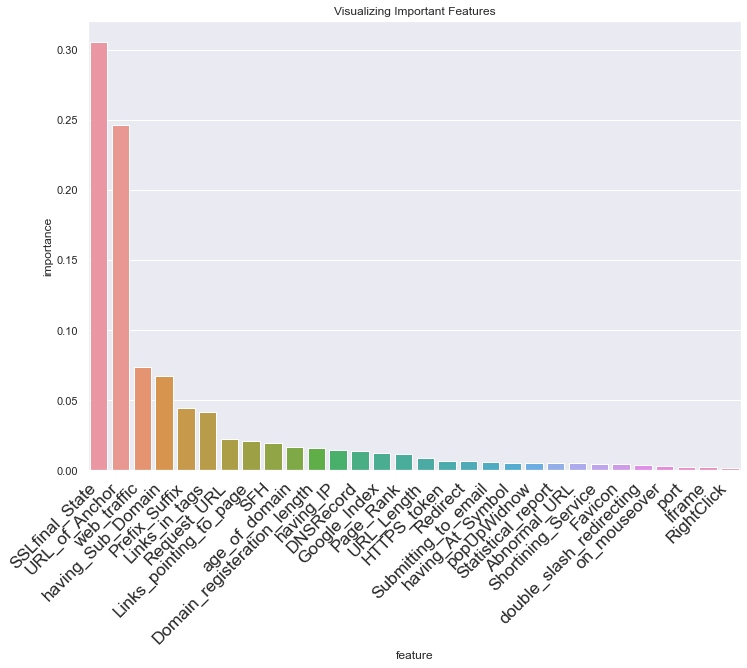

In [26]:
import seaborn as sns
# Creating a bar plot
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.xlabel("Features")
plt.ylabel("Feature Importance Score")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance,ax=ax)

In [27]:
important_feature = feature_importances_df.feature[:-3]

### Decision tree Hyperparameter tuning

In [28]:
x = df[important_feature].values 
y = df['Result'].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

>1, train: 0.886, test: 0.897
>2, train: 0.903, test: 0.916
>3, train: 0.906, test: 0.914
>4, train: 0.920, test: 0.924
>5, train: 0.926, test: 0.929
>6, train: 0.934, test: 0.931
>7, train: 0.941, test: 0.935
>8, train: 0.948, test: 0.939
>9, train: 0.954, test: 0.939
>10, train: 0.961, test: 0.948
>11, train: 0.969, test: 0.954
>12, train: 0.973, test: 0.958
>13, train: 0.977, test: 0.958
>14, train: 0.982, test: 0.960
>15, train: 0.985, test: 0.959
>16, train: 0.987, test: 0.962
>17, train: 0.989, test: 0.963
>18, train: 0.990, test: 0.961
>19, train: 0.990, test: 0.964
>20, train: 0.990, test: 0.966


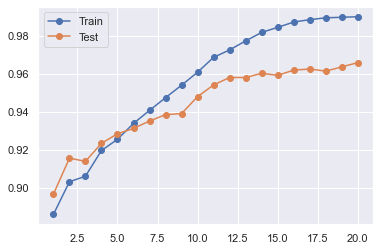

In [29]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(x_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(x_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(x_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

## Randomforest Hyperparameter tuning and over fitting checking

>1, train: 0.901, test: 0.908
>2, train: 0.914, test: 0.927
>3, train: 0.918, test: 0.929
>4, train: 0.924, test: 0.929
>5, train: 0.927, test: 0.933
>6, train: 0.935, test: 0.940
>7, train: 0.937, test: 0.945
>8, train: 0.945, test: 0.949
>9, train: 0.953, test: 0.954
>10, train: 0.961, test: 0.961
>11, train: 0.969, test: 0.968
>12, train: 0.975, test: 0.968
>13, train: 0.979, test: 0.969
>14, train: 0.983, test: 0.970
>15, train: 0.986, test: 0.971
>16, train: 0.989, test: 0.973
>17, train: 0.989, test: 0.973
>18, train: 0.990, test: 0.972
>19, train: 0.990, test: 0.974
>20, train: 0.991, test: 0.973
>21, train: 0.991, test: 0.974
>22, train: 0.991, test: 0.974
>23, train: 0.991, test: 0.972
>24, train: 0.991, test: 0.972
>25, train: 0.991, test: 0.974
>26, train: 0.991, test: 0.973
>27, train: 0.991, test: 0.975
>28, train: 0.991, test: 0.974
>29, train: 0.991, test: 0.973


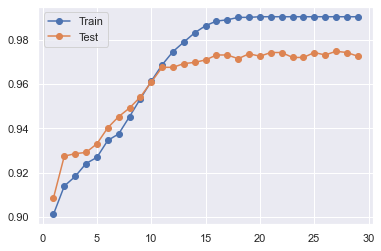

In [30]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
train_scores, test_scores = list(), list()
# n_estimators = [100,200,250,300,450,500]
values = [i for i in range(1, 30)]
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = RandomForestClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(x_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(x_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(x_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

choosing to tune max_depth as a hyper parameter becasue this hyperparameter controls overfitting. Choosing max_depth = 16 for final model to build because here we are geting best test accuracy and for further values of max_depth the validation remains almost constant

## Final Model

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_predict
rf = RandomForestClassifier(n_estimators=100,max_depth=16)
final_model = rf.fit(x, y)

In [32]:
df_test = pd.read_csv('Phising_Testing_Dataset.csv')
df_test = df_test.set_index('key')

In [33]:
x_val = df_test[important_feature]

In [34]:
final_df = pd.DataFrame()
final_df['key'] = x_val.index
final_df['Result'] = final_model.predict(x_val)

In [35]:
final_df

,key,Result
0,21338,1
1,21339,-1
2,21340,-1
3,21341,-1
4,21342,1
...,...,...
2095,23433,1
2096,23434,1
2097,23435,-1
2098,23436,1


In [37]:
# writing the solution to the csv
final_df.to_csv("submission.csv",index=None)